<a href="https://colab.research.google.com/github/phaneo/TF2-Complete/blob/main/03_CV_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to CNNs and CV with Tensorflow

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-06 09:43:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.111.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.3’

pizza_steak.zip.3   100%[===================>] 104.47M   177MB/s    in 0.6s    

2022-08-06 09:43:43 (177 MB/s) - ‘pizza_steak.zip.3’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in 'pizza_steak'. 
There are 2 directories and 0 images in 'pizza_steak/train'. 
There are 0 directories and 750 images in 'pizza_steak/train/pizza'. 
There are 0 directories and 750 images in 'pizza_steak/train/steak'. 
There are 2 directories and 0 images in 'pizza_steak/test'. 
There are 0 directories and 250 images in 'pizza_steak/test/pizza'. 
There are 0 directories and 250 images in 'pizza_steak/test/steak'. 


In [ ]:
# Another way to find no. of images in a dir

num_pizza_train_imgs = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_train_imgs

750

To visualize our images, first let's get the class names

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


Let's visualize our images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir, target_class):
  # Set up target dir
  tgt_folder = target_dir+target_class

  # Get a random img path
  random_img  = random.sample(os.listdir(tgt_folder), 1)

  # Read in the img and plot it
  img = mpimg.imread(tgt_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img


Image shape: (512, 512, 3)


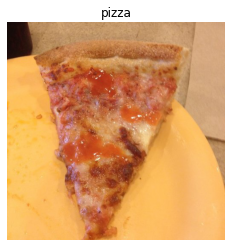

In [ ]:
# View a random img from the training dataset
img = view_random_img("pizza_steak/train/", target_class="pizza")

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 22,  12,  11],
        [ 22,  12,  11],
        [ 21,  11,  10],
        ...,
        [208, 160, 122],
        [209, 161, 123],
        [210, 162, 124]],

       [[ 21,  11,  10],
        [ 20,  10,   9],
        [ 20,  10,   9],
        ...,
        [208, 160, 122],
        [208, 160, 122],
        [208, 160, 122]],

       [[ 21,  11,  10],
        [ 20,  10,   9],
        [ 19,   9,   8],
        ...,
        [208, 160, 122],
        [207, 159, 121],
        [206, 158, 120]],

       ...,

       [[253, 188,  88],
        [253, 188,  88],
        [254, 189,  89],
        ...,
        [252, 180,  95],
        [252, 180,  95],
        [252, 180,  95]],

       [[253, 188,  88],
        [253, 188,  88],
        [254, 189,  89],
        ...,
        [251, 179,  94],
        [251, 179,  94],
        [251, 179,  94]],

       [[253, 188,  88],
        [253, 188,  88],
        [254, 189,  89],
        ...,
        [251, 179,  9

## An end-to-end example

Let's build a CNN to find patterns in our images

* Load our images
* Preprocess images
* Build a CNN
* Compile the CNN
* Fit the CNN to the training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode = 'binary',
                                               seed=42)

# Build a CNN model (same as Tiny VGG model)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size = 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_1.fit(train_data, 
            epochs = 5, 
            steps_per_epoch = len(train_data), 
            validation_data = valid_data,
            validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 78s 215ms/step - loss: 0.5550 - accuracy: 0.7160 - val_loss: 0.4009 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4162 - accuracy: 0.8160 - val_loss: 0.3759 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3852 - accuracy: 0.8367 - val_loss: 0.3054 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3362 - accuracy: 0.8667 - val_loss: 0.3068 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3027 - accuracy: 0.8740 - val_loss: 0.3790 - val_accuracy: 0.8500


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(train_data, 
            epochs = 5, 
            steps_per_epoch = len(train_data), 
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 1.6841 - accuracy: 0.4787 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 150528)            0         
                                                                 
 dense_15 (Dense)            (None, 4)                 602116    
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(train_data, 
            epochs = 5, 
            steps_per_epoch = len(train_data), 
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 2.0269 - accuracy: 0.6693 - val_loss: 0.6147 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 1.2229 - accuracy: 0.6840 - val_loss: 0.5921 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.9820 - accuracy: 0.6940 - val_loss: 0.9699 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6944 - accuracy: 0.7440 - val_loss: 0.9545 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6312 - accuracy: 0.7573 - val_loss: 0.7745 - val_accuracy: 0.7160


In [ ]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_18 (Dense)            (None, 100)               15052900  
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
15073201/31101

484.6532587376612

## Binary classification breakdown

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Compile the model
5. Fit the model
6. Adjust hyperparameters & improve the model
7. Repeat until satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 306, 3)


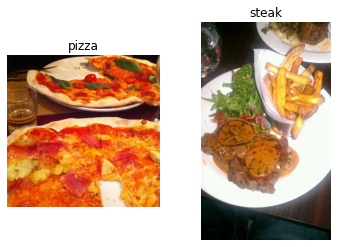

In [ ]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
pizza_img = view_random_img("pizza_steak/train/", "pizza")
plt.subplot(1, 2, 2)
steak_img = view_random_img("pizza_steak/train/", "steak")


### 2. Preprocess the data

In [ ]:
# Define directory hubs

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next we need to turn our data into batches.

In [ ]:
# Create train & test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load our data from directories

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels.shape

(32,)

### 3. Create a baseline CNN model

In [ ]:
len(train_data)

47

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(10, 3, strides = 1, padding = "valid", activation="relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 1.1862 - accuracy: 0.6493 - val_loss: 0.4846 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4600 - accuracy: 0.7947 - val_loss: 0.4155 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3686 - accuracy: 0.8500 - val_loss: 0.4263 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.1969 - accuracy: 0.9353 - val_loss: 0.4203 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.0858 - accuracy: 0.9733 - val_loss: 0.7529 - val_accuracy: 0.7760


### 4. Evaluate the model

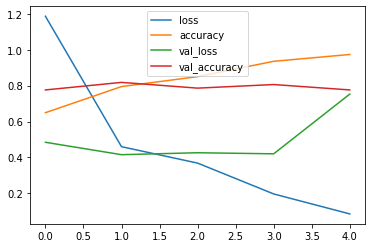

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot()

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for validation and training metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

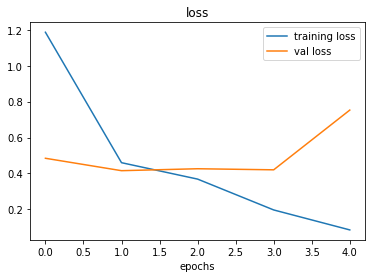

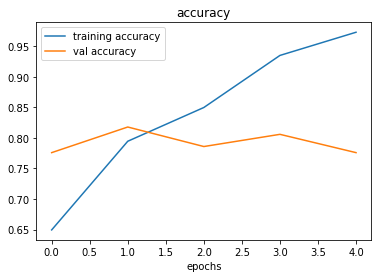

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust model parameters

Fitting a ML model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

To induce overfitting:
1. Increase no. of conv layers
2. Increase no. of conv filters
3. Add another dense layer to the output of the flattened layer

To reduce overfitting:
1. Add data augmentation
2. Add regularization layers (MaxPool2D, etc)
3. Add more data

In [ ]:
# Create a new baseline model

model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6135 - accuracy: 0.6527 - val_loss: 0.4556 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4757 - accuracy: 0.7880 - val_loss: 0.4109 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4224 - accuracy: 0.8073 - val_loss: 0.4128 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4195 - accuracy: 0.8060 - val_loss: 0.3868 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3885 - accuracy: 0.8320 - val_loss: 0.3226 - val_accuracy: 0.8740


In [ ]:
model_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 26, 26, 10)     

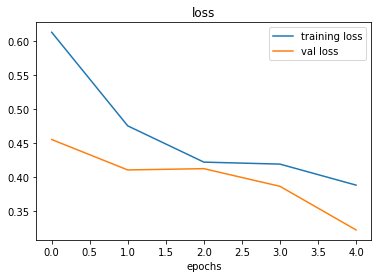

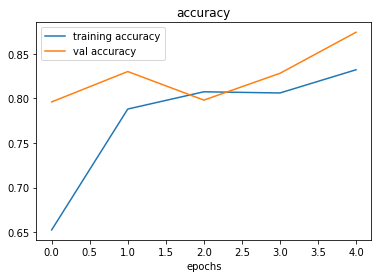

In [ ]:
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator instance with data augmentation
train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.3,
                                       horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data aug for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
IMG_SIZE = (224, 224)

# Import data and augment it from training dir

print("Augmented training data:")
train_data_augmented = train_datagen_aug.flow_from_directory(train_dir, 
                                                             target_size = IMG_SIZE,
                                                             class_mode = 'binary',
                                                             shuffle = False)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SIZE,
                                               class_mode = 'binary',
                                               shuffle = False)

print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             class_mode = 'binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
aug_imgs, aug_labels = train_data_augmented.next()

Showing image no.:  25


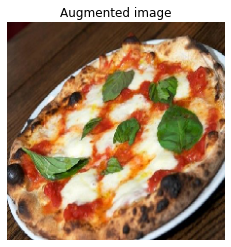

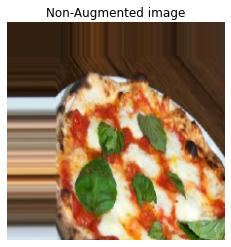

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32)
print("Showing image no.: ", random_number)
plt.imshow(images[random_number])
plt.title("Augmented image")
plt.axis(False)

plt.figure()
plt.imshow(aug_imgs[random_number])
plt.title("Non-Augmented image")
plt.axis(False)

plt.show()

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 516ms/step - loss: 0.7065 - accuracy: 0.5327 - val_loss: 0.6861 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6995 - accuracy: 0.5000 - val_loss: 0.6619 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 23s 498ms/step - loss: 0.6905 - accuracy: 0.5920 - val_loss: 0.6530 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 24s 502ms/step - loss: 0.6678 - accuracy: 0.6360 - val_loss: 0.5856 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 23s 500ms/step - loss: 0.6686 - accuracy: 0.6167 - val_loss: 0.5700 - val_accuracy: 0.8160


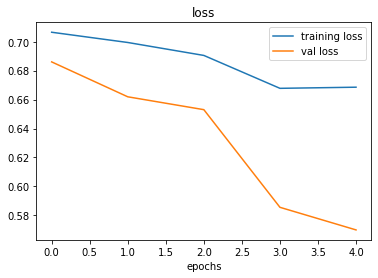

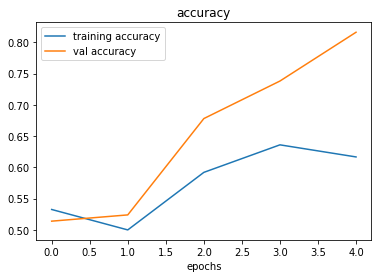

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_aug_shuffled = train_datagen_aug.flow_from_directory(train_dir,
                                                                target_size = IMG_SIZE,
                                                                class_mode = 'binary',
                                                                shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_aug_shuffled, 
                        epochs = 5,
                        steps_per_epoch = len(train_data_aug_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6574 - accuracy: 0.6007 - val_loss: 0.5793 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 23s 500ms/step - loss: 0.5760 - accuracy: 0.7007 - val_loss: 0.4200 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 23s 496ms/step - loss: 0.5237 - accuracy: 0.7453 - val_loss: 0.3664 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 23s 497ms/step - loss: 0.4993 - accuracy: 0.7593 - val_loss: 0.3830 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4984 - accuracy: 0.7547 - val_loss: 0.3360 - val_accuracy: 0.8580


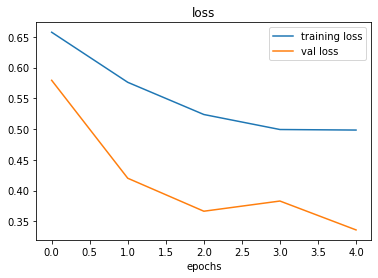

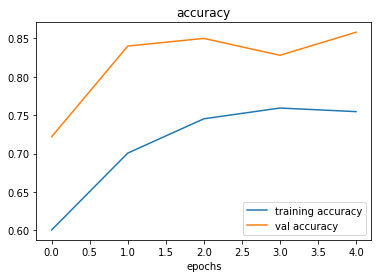

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_8 = model_8.fit(train_data_aug_shuffled, 
            epochs = 10,
            steps_per_epoch = len(train_data_aug_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 502ms/step - loss: 0.6802 - accuracy: 0.5713 - val_loss: 0.6048 - val_accuracy: 0.6440
Epoch 2/10
47/47 [==============================] - 23s 493ms/step - loss: 0.5703 - accuracy: 0.7027 - val_loss: 0.4437 - val_accuracy: 0.8180
Epoch 3/10
47/47 [==============================] - 23s 494ms/step - loss: 0.5495 - accuracy: 0.7147 - val_loss: 0.3686 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 23s 495ms/step - loss: 0.5001 - accuracy: 0.7593 - val_loss: 0.3769 - val_accuracy: 0.8380
Epoch 5/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5063 - accuracy: 0.7480 - val_loss: 0.4059 - val_accuracy: 0.8140
Epoch 6/10
47/47 [==============================] - 23s 488ms/step - loss: 0.4811 - accuracy: 0.7733 - val_loss: 0.4078 - val_accuracy: 0.8300
Epoch 7/10
47/47 [==============================] - 23s 494ms/step - loss: 0.4649 - accuracy: 0.7833 - val_loss: 0.2856 - val_accuracy: 0.8860

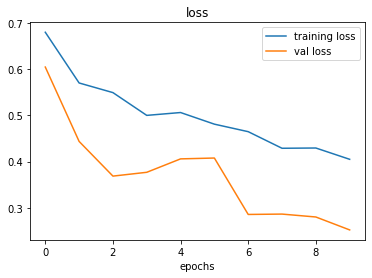

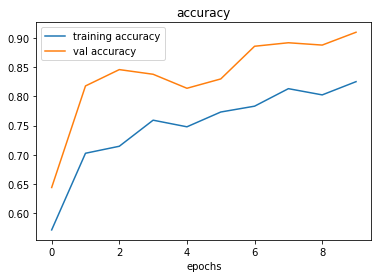

In [ ]:
plot_loss_curves(history_8)

### Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-08-06 09:58:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-08-06 09:58:38 (202 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



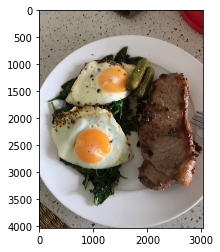

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
# Create a function to import the img and resize it to use it with our model

def load_and_prep_img(filename, img_shape = 224):
  """
  Reads an image and turns it into a tensor and reshapes it into
  (img_shape, img_shape, colour_channels)
  """
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image to range 0 to 1
  img = img / 255.
  return img
  

In [ ]:
img = load_and_prep_img("03-steak.jpeg")

img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(img, axis = 0))

In [ ]:
# We can index the predicted class by rounding the pred_prob and indexing it on class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image, makes a prediction on image and 
  plots the image with the predicted class as title
  """
  # Import and load the image
  img = load_and_prep_img(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


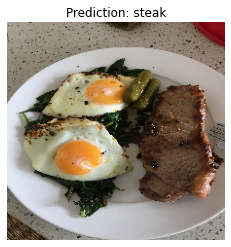

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg")

--2022-08-06 09:58:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-08-06 09:58:41 (262 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



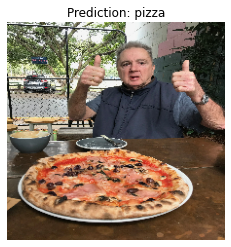

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg")

## Multi-class Image classification

1. Become one with the data
2. Preprocess the data
3. Create & Compile a model (baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust the hyperparameters to improve the model
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
zipref = zipfile.ZipFile("10_food_classes_all_data.zip")
zipref.extractall()
zipref.close()

--2022-08-06 09:58:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.208, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   192MB/s    in 2.6s    

2022-08-06 09:58:44 (192 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data/
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 10 directories and 0 ima

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Visualzie the data
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)



['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


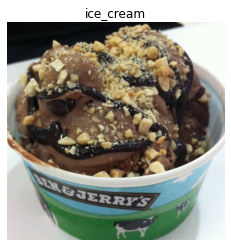

In [ ]:
img = view_random_img(target_dir=train_dir,
                      target_class=random.choice(class_names))

### 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)


In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a baseline model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(42)


model_9 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),    
    Flatten(),
    Dense(10, activation = "softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data, 
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 199ms/step - loss: 2.1340 - accuracy: 0.2189 - val_loss: 1.9877 - val_accuracy: 0.2888
Epoch 2/5
235/235 [==============================] - 46s 196ms/step - loss: 1.8794 - accuracy: 0.3480 - val_loss: 1.9059 - val_accuracy: 0.3284
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.4386 - accuracy: 0.5116 - val_loss: 2.0628 - val_accuracy: 0.2972
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 0.8407 - accuracy: 0.7232 - val_loss: 2.6888 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.3592 - accuracy: 0.8876 - val_loss: 3.7830 - val_accuracy: 0.2640


### Evaluate the model

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 3.7830 - accuracy: 0.2640


[3.7830007076263428, 0.2639999985694885]

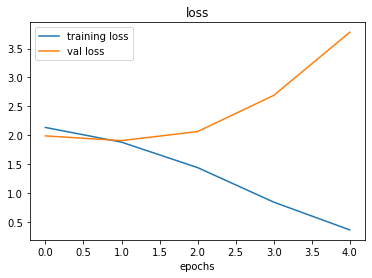

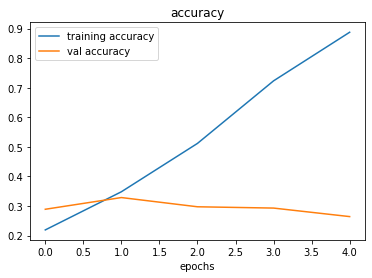

In [ ]:
plot_loss_curves(history_9)

### Adjust the model hyperparameters

Our model seems to be overfitting.

To reduce overfitting:
1. Get more data
2. Simplify the model (reduce complexity by reducing no. of layers/hidden units per layer)
3. Use data augmentation

In [ ]:
# Let's simplify the model first

model_10 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])

history_10 = model_10.fit(train_data,
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = test_data,
             validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 239ms/step - loss: 2.1196 - accuracy: 0.2421 - val_loss: 1.9981 - val_accuracy: 0.2848
Epoch 2/5
235/235 [==============================] - 62s 263ms/step - loss: 1.7606 - accuracy: 0.3988 - val_loss: 1.8678 - val_accuracy: 0.3496
Epoch 3/5
235/235 [==============================] - 46s 196ms/step - loss: 1.4006 - accuracy: 0.5357 - val_loss: 1.9376 - val_accuracy: 0.3352
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.8975 - accuracy: 0.7209 - val_loss: 2.2947 - val_accuracy: 0.3100
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.4686 - accuracy: 0.8740 - val_loss: 2.6308 - val_accuracy: 0.2968


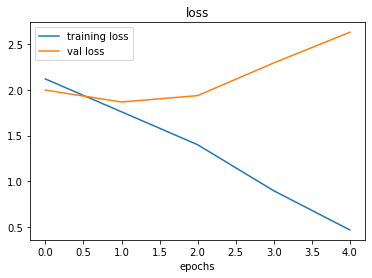

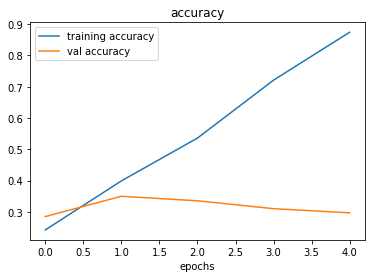

In [ ]:
plot_loss_curves(history_10)

No improvement by removing the layers. The model is still overfitting.
We may try data augmentation next to reduce overfitting.

### Using data augmentation to reduce overfitting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                    shear_range = 0.2,
                                    rotation_range = 0.2,
                                    zoom_range = 0.2,
                                    height_shift_range = 0.2,
                                    width_shift_range = 0.2,
                                    horizontal_flip = True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224, 224),
                                                       batch_size = 32,
                                                       class_mode = "categorical"
                                                       )

Found 7500 images belonging to 10 classes.


In [ ]:
model_11 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_11.compile(loss = "categorical_crossentropy",
                 optimizer = Adam(),
                 metrics = ["accuracy"])

history_11 = model_11.fit(train_data_aug,
                          epochs = 5,
                          steps_per_epoch = len(train_data_aug),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 525ms/step - loss: 2.1693 - accuracy: 0.2100 - val_loss: 1.9980 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 113s 479ms/step - loss: 2.0553 - accuracy: 0.2729 - val_loss: 1.9353 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 111s 474ms/step - loss: 2.0089 - accuracy: 0.2880 - val_loss: 1.8498 - val_accuracy: 0.3684
Epoch 4/5
235/235 [==============================] - 111s 473ms/step - loss: 1.9561 - accuracy: 0.3239 - val_loss: 1.8558 - val_accuracy: 0.3600
Epoch 5/5
235/235 [==============================] - 112s 475ms/step - loss: 1.9316 - accuracy: 0.3299 - val_loss: 1.8466 - val_accuracy: 0.3760


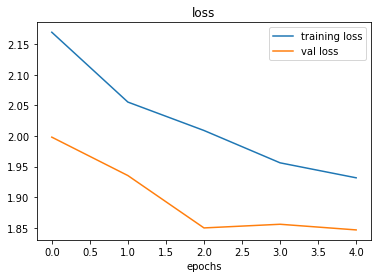

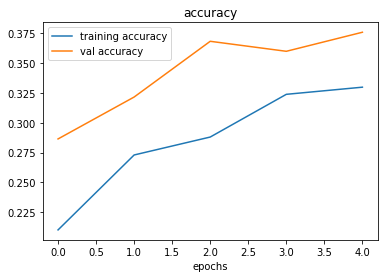

In [ ]:
plot_loss_curves(history_11)

### Repeat until satisfied

1. Restructuring the model architecture
2. Adjust the learning rate
3. Train for longer
4. Try transfer learning